# Coding Applications in Medicine: V/Q Scans

## Set up

In [1]:
# Import the relevant packages
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from PIL import Image

#Set up the path
folder_path = os.getcwd()

In [2]:
normal_V = cv.imread('normal_V.png', cv.IMREAD_GRAYSCALE)
normal_Q = cv.imread('normal_Q.png', cv.IMREAD_GRAYSCALE)

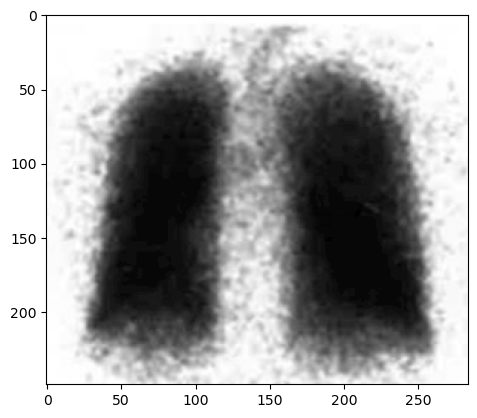

In [3]:
plt.imshow(normal_V, cmap='gray')

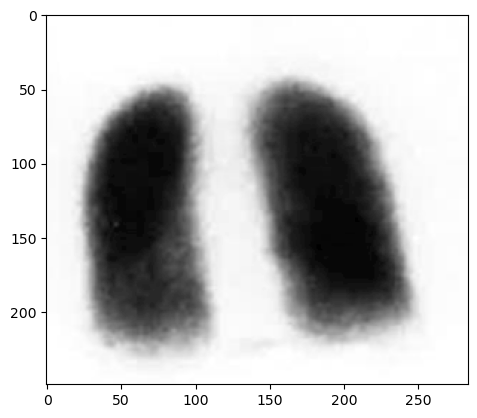

In [4]:
plt.imshow(normal_Q, cmap='gray')

## Thresholding

In [5]:
# Play around with the threshold value 0-255 and see what happens
thresh_val = 157
_, normal_V_thresh = cv.threshold(normal_V, thresh_val, 255, cv.THRESH_BINARY_INV)
_, normal_Q_thresh = cv.threshold(normal_Q, thresh_val, 255, cv.THRESH_BINARY_INV)

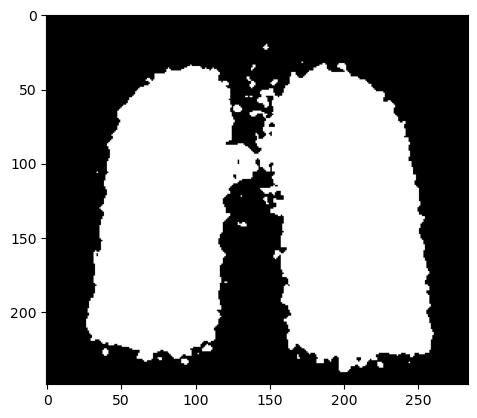

In [6]:
plt.imshow(normal_V_thresh, cmap='gray')

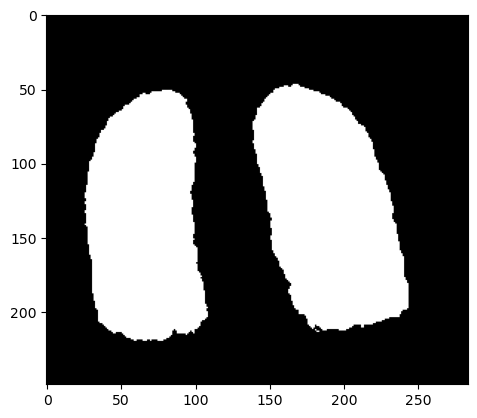

In [7]:
plt.imshow(normal_Q_thresh, cmap='gray')

## Binary Operations

In [8]:
VQ_and = cv.bitwise_and(normal_V_thresh, normal_Q_thresh)

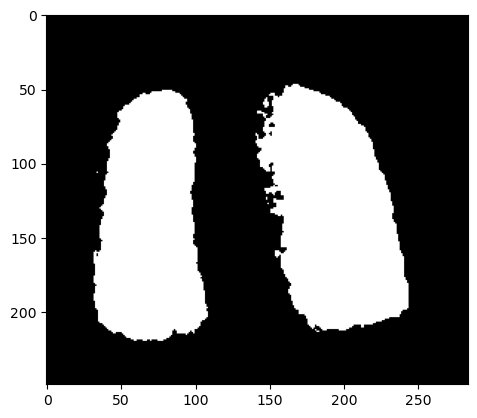

In [9]:
plt.imshow(VQ_and, cmap='gray')

## Count number of white pixels 

In [10]:
V_num_white = np.sum(normal_V_thresh == 255)
Q_num_white = np.sum(normal_Q_thresh == 255)

# TODO: Superimpose the two images and find the total number of white pixels 
VQ_or = cv.bitwise_or(normal_V_thresh, normal_Q_thresh)

total_pix = np.sum(VQ_or == 255)

print(V_num_white)
print(Q_num_white)

33351
23199


## Adaptive Thresholding 

In [11]:
norm_V_adaptThresh = cv.adaptiveThreshold(normal_V, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 121, 0)
norm_Q_adaptThresh = cv.adaptiveThreshold(normal_Q, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 121, 0)

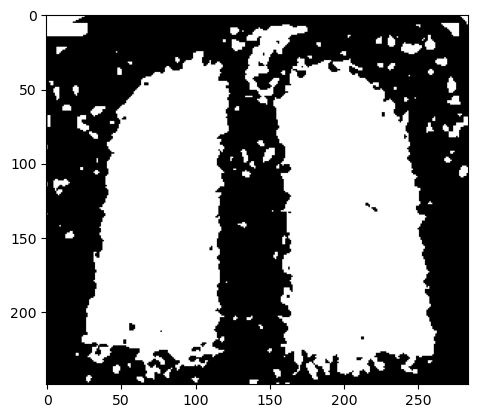

In [12]:
plt.imshow(norm_V_adaptThresh, cmap='gray')

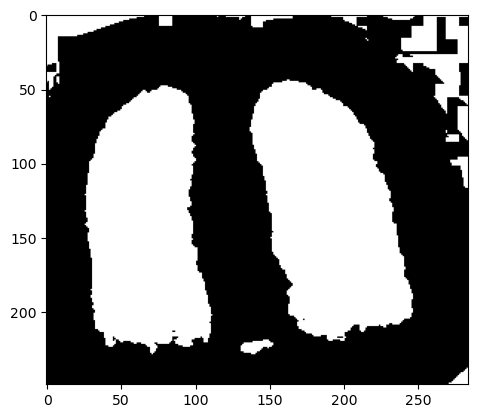

In [13]:
plt.imshow(norm_Q_adaptThresh, cmap='gray')

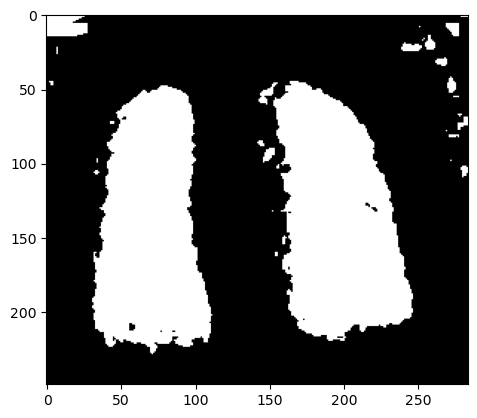

In [14]:
adapt_VQ = cv.bitwise_and(norm_V_adaptThresh, norm_Q_adaptThresh)
plt.imshow(adapt_VQ, cmap='gray')